In [ ]:
# Import dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [176]:
from datetime import date
import plotly.express as px
import seaborn as sns
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
cust_data_df = pd.read_csv("Resourses/marketing_campaign.csv")
cust_data_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
cust_data_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
print(cust_data_df.shape)
cust_data_df.info()

(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

In [6]:
cust_data_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#drop rows where income is NA
cust_data_df.dropna(axis = 0, inplace = True)

# Income

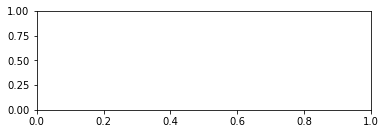

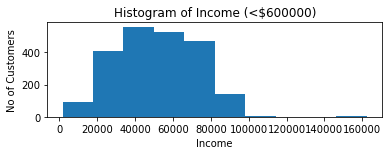

In [31]:
#Plot a histogram for income <$600000

plt.subplot(211)
cust_data_df.hist(column = 'Income')
plt.xlabel("Income")
plt.ylabel("No of Customers")
plt.title('Histogram of Income')
plt.subplot(212)
cust_data_df.query("Income < 600000")['Income'].plot.hist()
plt.xlabel("Income")
plt.ylabel("No of Customers")
plt.title('Histogram of Income (<$600000)')

plt.show()

In [90]:
fig = px.histogram(
    cust_data_df['Income'],
    title = "Customer's Income Distribution",
    nbins = 25
)
fig.update_layout(
    xaxis_title = "Customer's Income",
    yaxis_title = "Frequency")

fig.show()

In [88]:
fig = px.histogram(
    cust_data_df.query("Income < 600000")['Income'],
    title = "Customer's Income Distribution (<$600K)",
    nbins = 25
)
fig.update_layout(
    xaxis_title = "Customer's Income",
    yaxis_title = "Frequency")

fig.show()

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

# Age

In [37]:
# Year of Birth
def get_age(year_birth):
    today = date.today()
    age = today.year - year_birth
    return age

In [40]:
cust_data_df["Age"] = cust_data_df["Year_Birth"].apply(get_age)
cust_data_df["Age"].describe()

count    2216.000000
mean       53.179603
std        11.985554
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [91]:
fig = px.histogram(
    cust_data_df["Age"],
    title = "Customer's Age Distribution",
    nbins = 25
)
fig.update_layout(
    xaxis_title = "Customer's Age",
    yaxis_title = "Frequency")

fig.show()

### Stat Canada Age Categories:
Children (00-14 years)  
Youth (15-24 years)  
Adults (25-64 years)  
Seniors (65 years and over)  

In [164]:
# dividing age into groups
cust_data_df['Age_Group'] = pd.cut(x = cust_data_df['Age'], bins = [0, 14, 24, 64, 150],
                         labels = ['Child','Youth','Adult','Senior'])

In [165]:
print("Count per category in the feature Age_Group:\n", cust_data_df["Age_Group"].value_counts(), "\n")

Count per category in the feature Age_Group:
 Adult     1756
Senior     460
Child        0
Youth        0
Name: Age_Group, dtype: int64 



In [ ]:
#add barplot

# Date Joined

In [92]:
cust_data_df["Dt_Customer"] = pd.to_datetime(cust_data_df["Dt_Customer"])

dates = []
for x in cust_data_df["Dt_Customer"]:
    x = x.date()
    dates.append(x)
#print(dates)    
#Enrollment dates of the newest and oldest recorded customer
print("The newest customer enrolled on:", max(dates))
print("The oldest customer enrolled on:", min(dates))

The newest customer enrolled on: 2014-12-06
The oldest customer enrolled on: 2012-01-08


In [ ]:
#Cust_Days (ref: https://www.codegrepper.com/code-examples/python/extract+number+of+days+from+datatime+python)
days = []
max_date = max(dates) #taking it to be the newest customer
for x in dates:
    diff = max_date - x
    days.append(diff)
#print(days)

cust_data_df["Cust_Days"] = pd.to_numeric(cust_data_df["Cust_Days"].dt.days, downcast='integer')
#https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe

#cust_data_df["Cust_Days"] = (days / np.timedelta64(1, 'D')).astype(int)
#cust_data_df['Cust_Days2'] = cust_data_df['Cust_Days'].apply(lambda z: z.value)
#cust_data_df['Cust_Days2'] = cust_data_df['Cust_Days'].divide(86400)

In [146]:
# The day, month and year cutomer joined
cust_data_df['Year_Joined'] = cust_data_df['Dt_Customer'].dt.year
cust_data_df['Month_Joined'] = cust_data_df['Dt_Customer'].dt.strftime("%B")
cust_data_df['Day_Joined'] = cust_data_df['Dt_Customer'].dt.day_name()


In [161]:
cust_data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Family_Size,has_kids,TotalNumPurchases,Total_Acc_Cmp,Total_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,2012,April,Monday,Senior,0,1,0,25,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2014,August,Sunday,Senior,2,3,1,6,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2013,August,Wednesday,Adult,0,2,0,21,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,2014,October,Thursday,Adult,1,3,1,8,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,2014,January,Sunday,Adult,1,3,1,19,0,422


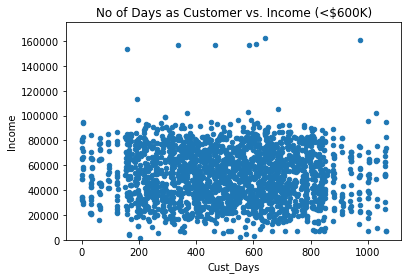

In [137]:
cust_data_df.plot.scatter(x = 'Cust_Days', y = 'Income')
#plt.xlim(0, 2)
plt.title("No of Days as Customer vs. Income (<$600K)")
plt.ylim(0, 175000)
plt.show(block=True)

# Marital Status, Family & Education

In [140]:
print("Education Values: ", cust_data_df["Education"].unique())
print("Marital_Status Values:", cust_data_df["Marital_Status"].unique())

print("Count per category in the feature Marital_Status:\n", cust_data_df["Marital_Status"].value_counts(), "\n")
print("Count per category in the feature Education:\n", cust_data_df["Education"].value_counts())

Education Values:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Count per category in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Count per category in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [144]:
map_status = {"Together": "Partner", "Married": "Partner",
              "YOLO": "Single", "Absurd": "Single", "Alone": "Single", "Widow": "Single", "Divorced": "Single"}

cust_data_df["Marital_Status_map"] = cust_data_df["Marital_Status"].replace(map_status)


map_edu = {"Graduation": "Graduate",
           "Master": "PostGrad", "PhD": "PostGrad",
           "Basic": "UnderGrad", "2n Cycle": "UnderGrad"}

cust_data_df["Education_map"] = cust_data_df["Education"].replace(map_edu)

In [145]:
print("Count per mapped category in Marital_Status:\n", cust_data_df["Marital_Status_map"].value_counts(), "\n")
print("Count per mapped category in Education:\n", cust_data_df["Education_map"].value_counts())

Count per mapped category in Marital_Status:
 Partner    1430
Single      786
Name: Marital_Status_map, dtype: int64 

Count per mapped category in Education:
 Graduate     1116
PostGrad      846
UnderGrad     254
Name: Education_map, dtype: int64


In [152]:
# Total children living in the household
cust_data_df["Children"] = cust_data_df["Kidhome"] + cust_data_df["Teenhome"]

In [156]:
#customer_df["Family_Size"] = customer_df["Marital_Status"].replace({0: 1, 1:2})+ customer_df["Total_kids"]
#customer_df["Family_Size"]

cust_data_df["Family_Size"] = cust_data_df["Marital_Status_map"].replace({"Single": 1, "Partner":2}) + cust_data_df["Children"]

cust_data_df["has_kids"] = np.where(cust_data_df.Children> 0, 1, 0)


# Other Stats

In [160]:
# Total number of purchases made per customer
cust_data_df['TotalNumPurchases'] = cust_data_df['NumWebPurchases'] + cust_data_df['NumCatalogPurchases'] + cust_data_df['NumStorePurchases'] + cust_data_df['NumDealsPurchases']

# Total number of accepted campaigns per customer
cust_data_df['Total_Acc_Cmp'] = cust_data_df['AcceptedCmp1'] + cust_data_df['AcceptedCmp2'] + cust_data_df['AcceptedCmp3'] + cust_data_df['AcceptedCmp4'] + cust_data_df['AcceptedCmp5'] + cust_data_df['Response']

#Total spendings on various items
cust_data_df["Total_Spent"] = (cust_data_df["MntWines"] + cust_data_df["MntFruits"] + cust_data_df["MntMeatProducts"] 
                        + cust_data_df["MntFishProducts"] + cust_data_df["MntSweetProducts"] + cust_data_df["MntGoldProds"])

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

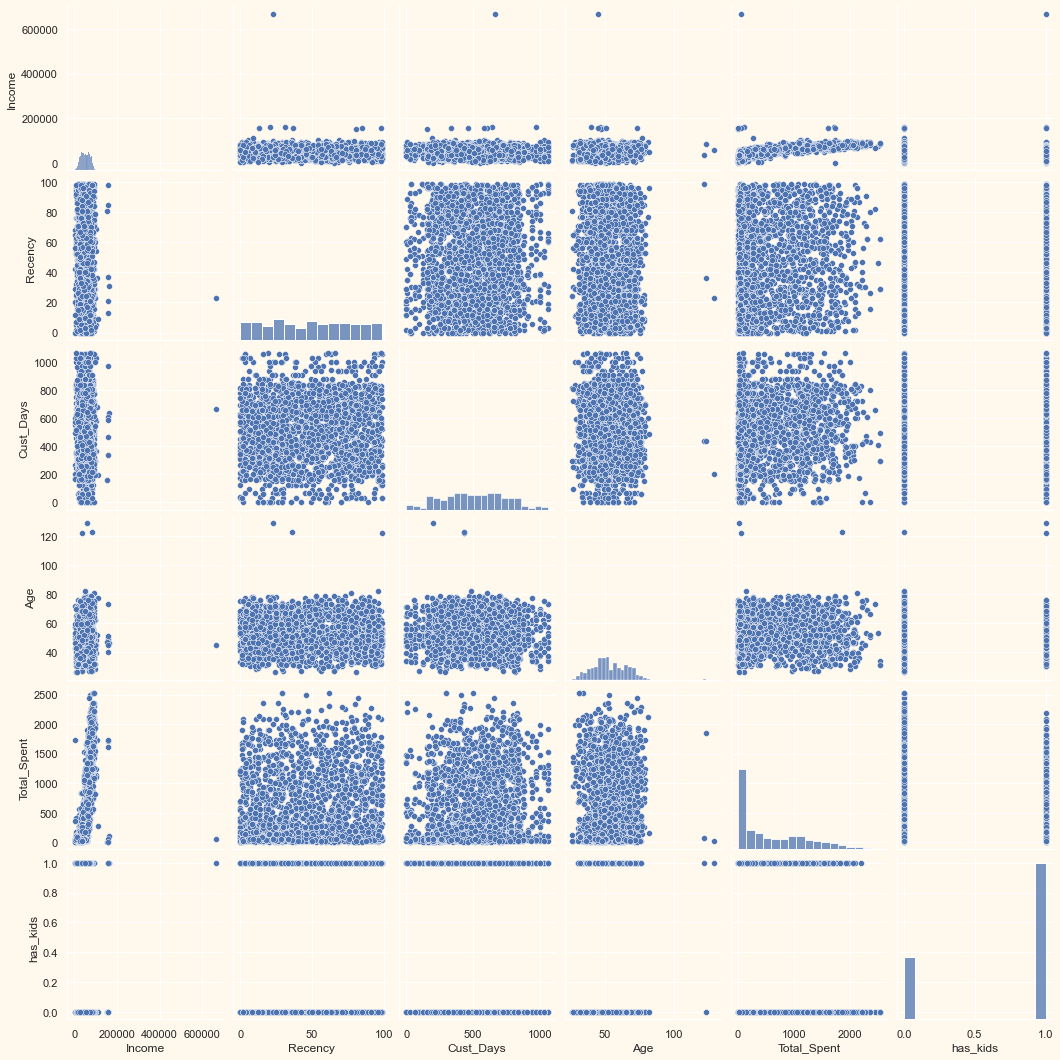

In [173]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

#Plotting following features
To_Plot = [ "Income", "Recency", "Cust_Days", "Age", "Total_Spent", "has_kids"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(cust_data_df[To_Plot])
#Taking hue 
plt.show()

In [184]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red") #text_coordinates is location of line on plot
    plt.title(title)
    plt.xlabel('Income (<$600k)')
    plt.ylabel(y_label)
    plt.show()
    
    print(f"The p-value is: {p_value}")
    print(f"The r-value is: {r_value:.3f}")

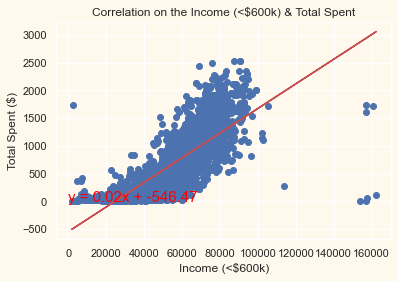

The p-value is: 0.0
The r-value is: 0.793


In [185]:
x_values = cust_data_df.query("Income < 600000")['Income']
y_values = cust_data_df.query("Income < 600000")['Total_Spent']

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Correlation on the Income (<$600k) & Total Spent', 'Total Spent ($)',(10,0))